<a href="https://colab.research.google.com/github/akfalah/03_AhmadKhoirulFalah/blob/main/Week11_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 2s (3,242 kB/s)
debconf: unable to ini

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pytesseract

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PROVINSI SUMATERA UTARA
KABUPATEN NIAS

KIK 1 12040505036?0001

ama EDO FURNAMA
Tempek/Tgi Lahir : NIAS, 05-03-1967

Jenis Kelamin LAKI-LAKI Gol, Darah : B
UISUN II HILIHAMBAWA
RTRW 1 0017003

KavDesa —: HILIGODU TANOSEO

Kecamatan: HILIDUHO

 

Agama : KATHOLIK
Status Perkawinan : CERAI HIDUP
Pekerjaan : WARTAWAN

Kewurganegaraan: WNI
Beriaku Hingga: 05-03-2018

 






















 



 






































































 



 








 

Ti




 

































































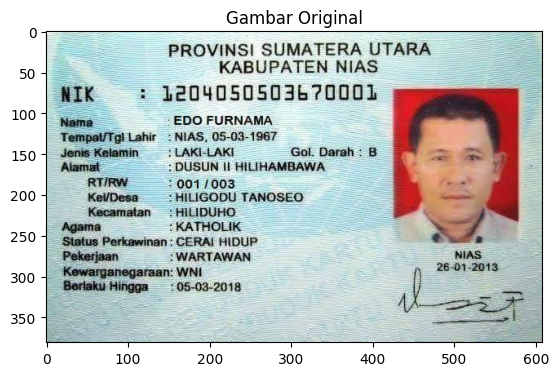

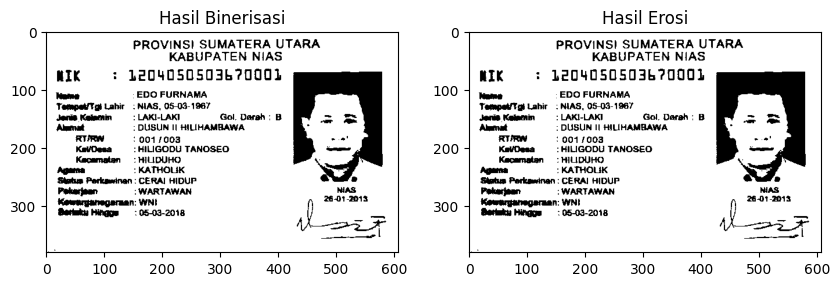

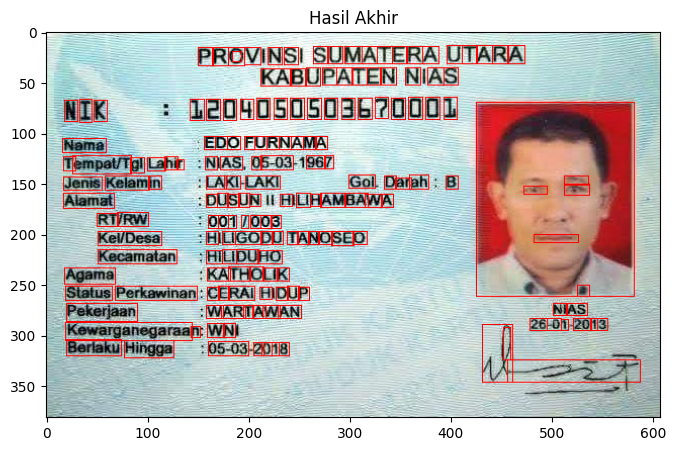

In [23]:
# Load data
ktp_img = cv.imread('/content/drive/MyDrive/pcvk/KTP_More/ktp5.png')
ori = cv.cvtColor(ktp_img.copy(), cv.COLOR_BGR2RGB)

# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(ktp_img, (5, 5), 0.5)

# Konversi ke citra grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi setelah operasi binerisasi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(ktp_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
        cropped = erode[y:y + h, x:x + w]
        text = pytesseract.image_to_string(cropped, lang="ind")
        print(text)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(ktp_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
        cropped = erode[y:y + h, x:x + w]
        text = pytesseract.image_to_string(cropped, lang="ind")
        print(text)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(ktp_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
        cropped = erode[y:y + h, x:x + w]
        text = pytesseract.image_to_string(cropped, lang="ind")
        print(text)

# Menampilkan gambar matplotlib
plt.subplots(1)
plt.title("Gambar Original")
plt.imshow(ori)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Hasil Binerisasi')
axs[0].imshow(bw, cmap='gray')

axs[1].set_title('Hasil Erosi')
axs[1].imshow(erode, cmap='gray')

fig1, axs1 = plt.subplots(figsize=(10, 5))
axs1.set_title('Hasil Akhir')
axs1.imshow(cv.cvtColor(ktp_img, cv.COLOR_BGR2RGB))

plt.show()